# Python-for-Finance-Capital-Asset-Pricing-Model-CAPM-Project

## IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme = 'monokai', context= 'notebook', ticks= True, grid= False)

In [4]:
# Read the stock data file
df = pd.read_csv("stocks_dataset.csv")
df.head()

Date         FB       TWTR       NFLX          BA          T  \
0   11/7/2013  47.560001  44.900002  46.694286  131.509995  35.110001   
1   11/8/2013  47.529999  41.650002  47.842857  133.490005  35.169998   
2  11/11/2013  46.200001  42.900002  48.272858  132.529999  35.029999   
3  11/12/2013  46.610001  41.900002  47.675713  132.330002  35.169998   
4  11/13/2013  48.709999  42.599998  47.897144  133.169998  35.070000   

         MGM        TSLA        sp500  
0  18.580000  139.770004  1747.150024  
1  19.090000  137.949997  1770.609985  
2  19.200001  144.699997  1771.890015  
3  19.260000  137.800003  1767.689941  
4  19.700001  138.699997  1782.000000

In [5]:
# Getting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [6]:
df.describe().T

count         mean         std          min          25%          50%  \
FB     1699.0   135.966863   50.062473    44.820000    88.080002   136.759995   
TWTR   1699.0    31.296698   11.508628    14.010000    19.600001    31.610001   
NFLX   1699.0   195.423654  127.700712    44.887142    90.474998   143.830002   
BA     1699.0   218.325633   98.968191    95.010002   132.840004   158.289993   
T      1699.0    35.296986    3.412142    26.770000    32.790001    34.900002   
MGM    1699.0    25.720865    5.200605     7.140000    21.935001    25.879999   
TSLA   1699.0   311.299388  203.097452   120.500000   218.829994   253.740005   
sp500  1699.0  2413.219428  424.825240  1741.890015  2053.294921  2360.159912   

               75%          max  
FB      178.075005   268.440002  
TWTR     38.229999    73.309998  
NFLX    320.024993   548.729980  
BA      334.360001   440.619995  
T        38.004999    43.470001  
MGM      29.250000    38.029999  
TSLA    323.565002  1643.000000  
sp500  2783.330078  3386.149902

## PERFORM DATA SCALING 

In [7]:
# Function to normalize the prices based on the initial price
def normalize(stocks_df):
    x = stocks_df.copy()
    for i in df.columns[1:]:
        x[i] = x[i]/x[i][0]
        
    return x

In [8]:
stocks_df = normalize(df)
stocks_df.head()

Date        FB      TWTR      NFLX        BA         T       MGM  \
0   11/7/2013  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   11/8/2013  0.999369  0.927617  1.024598  1.015056  1.001709  1.027449   
2  11/11/2013  0.971405  0.955457  1.033807  1.007756  0.997721  1.033369   
3  11/12/2013  0.980025  0.933185  1.021018  1.006235  1.001709  1.036598   
4  11/13/2013  1.024180  0.948775  1.025760  1.012623  0.998861  1.060280   

       TSLA     sp500  
0  1.000000  1.000000  
1  0.986979  1.013428  
2  1.035272  1.014160  
3  0.985905  1.011756  
4  0.992345  1.019947

## PERFORM DATA VISUALIZATION

In [43]:
# Function to plot interactive plot

def intrective_plot(df, title):
    fig = px.line(title=title, width=1000, height=600)
    for i in df.columns[1:]:
        fig.add_scatter(x=df["Date"], y= df[i], name=i)
        
        
    fig.show()


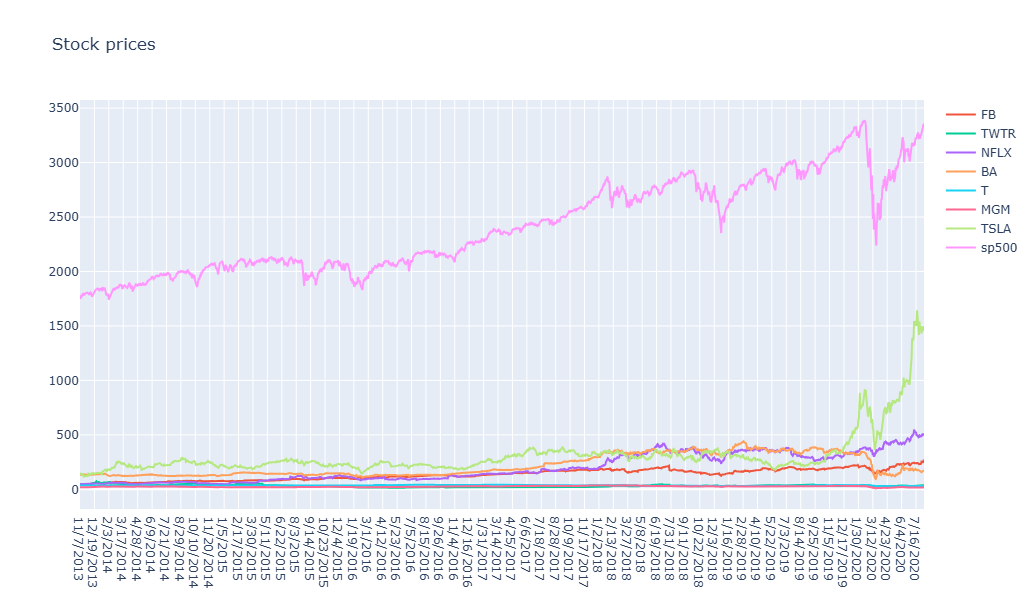

In [44]:
# Plot interactive chart
intrective_plot(df, "Stock prices")

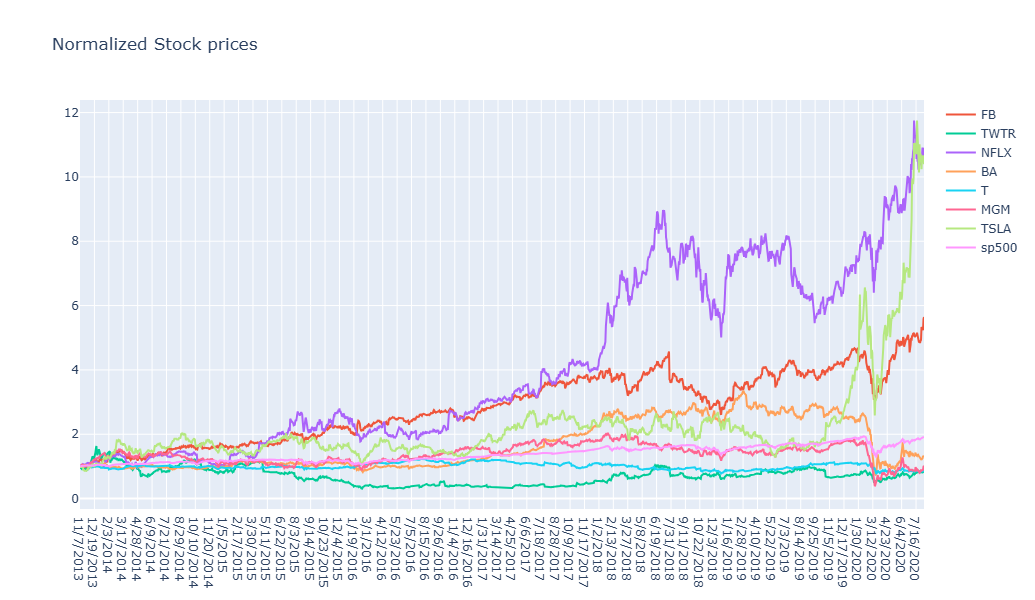

In [45]:
# Plot normalized interactive chart
intrective_plot(stocks_df, "Normalized Stock prices")

## DEVELOP A FUNCTION TO CALCULATE DAILY RETURNS

In [50]:
#((df["FB"] - df["FB"].shift()) / df["FB"].shift())*100

In [46]:
# Function to calculate the daily returns 
def daily_return(df):
    daily_return_df = df.copy()
    
    for i in df.columns[1:]:
        daily_return_df[i] = ((df[i] - df[i].shift()) / df[i].shift())*100
        
        daily_return_df[i][0]=0
    
    return daily_return_df

In [47]:
stock_daily_return = daily_return(df)
stock_daily_return

C:\Users\mukht\AppData\Local\Temp\ipykernel_6256\218624568.py:8: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\mukht\AppData\Local\Temp\ipykernel_6256\218624568.py:8: FutureWarning:

ChainedAssignmentError: behaviour will change in 

Date        FB      TWTR      NFLX        BA         T        MGM  \
0      11/7/2013  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1      11/8/2013 -0.063082 -7.238307  2.459768  1.505597  0.170883   2.744887   
2     11/11/2013 -2.798229  3.001200  0.898778 -0.719159 -0.398064   0.576223   
3     11/12/2013  0.887446 -2.331002 -1.237020 -0.150907  0.399655   0.312495   
4     11/13/2013  4.505467  1.670635  0.464452  0.634774 -0.284328   2.284533   
...          ...       ...       ...       ...       ...       ...        ...   
1694    8/3/2020 -0.674101 -0.027481  1.992307  2.702534  0.135230   1.429459   
1695    8/4/2020 -0.845374 -0.109923  2.210104  1.725521  1.316674   2.450974   
1696    8/5/2020 -0.284196  1.210462 -1.477519  5.579446 -0.533156   0.000000   
1697    8/6/2020  6.486835  2.446311  1.388142 -1.193483 -0.033501  10.406699   
1698    8/7/2020  1.191195 -1.459273 -2.818806 -1.265966  0.603217   3.087768   

          TSLA     sp500  
0     0.000000  0.000000  
1    -1.302144  1.342756  
2     4.893077  0.072293  
3    -4.768482 -0.237039  
4     0.653116  0.809534  
...        ...       ...  
1694  3.790991  0.718102  
1695  0.134680  0.361193  
1696 -0.133153  0.642974  
1697  0.307062  0.642770  
1698 -2.475194  0.063303  

[1699 rows x 9 columns]

## CALCULATE BETA FOR TESLA STOCK

In [51]:
# Select any stock, let's say Tesla
stock_daily_return["TSLA"]

0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

In [52]:
# Select the S&P500 (Market)
stock_daily_return["sp500"]

0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

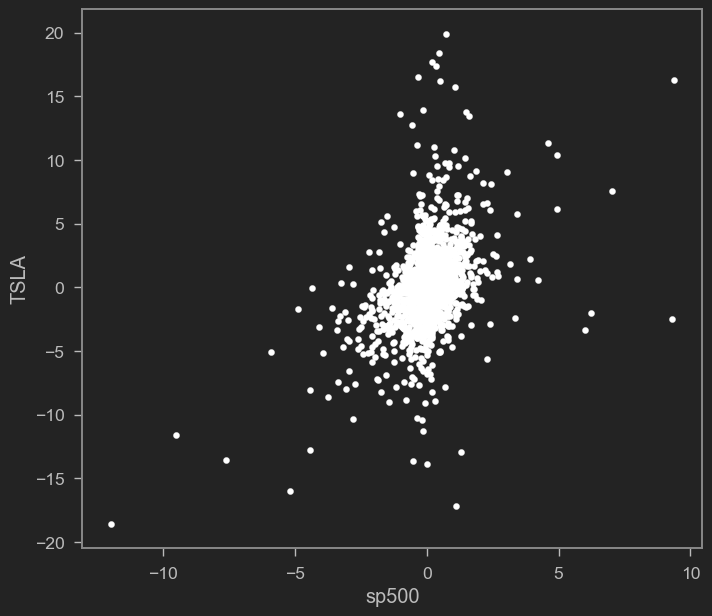

In [53]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stock_daily_return.plot(kind="scatter", x = "sp500", y= "TSLA", color="w");

Beta represents the slope of the line regression line (market return vs. stock return). Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500). Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets; 
Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. Tech stocks generally have higher betas than S&P500 but they also have excess returns
MGM is 65% more volatile than the S&P500!

In [54]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta_TSLA, alpha = np.polyfit(stock_daily_return['sp500'], stock_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta_TSLA, alpha))  

Beta for TSLA stock is = 1.2359723602006574 and alpha is = 0.137162009932369


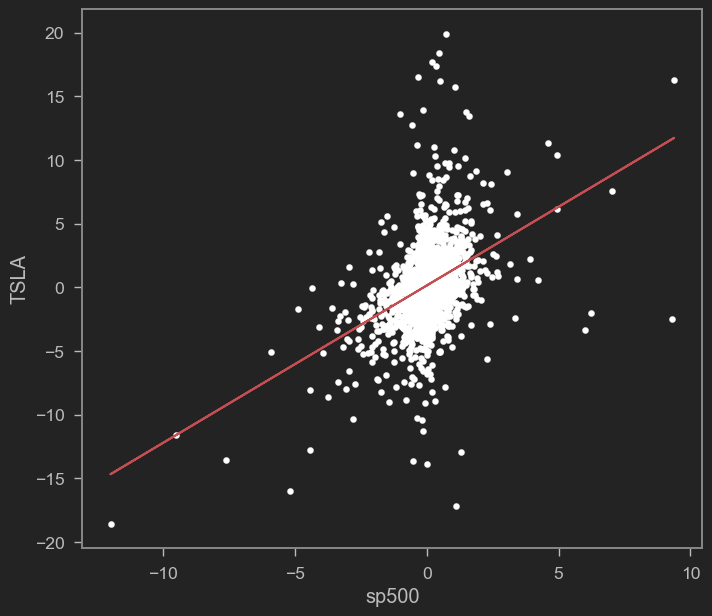

In [55]:
# Now let's plot the scatter plot and the straight line on one plot
stock_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'w')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stock_daily_return['sp500'], beta_TSLA * stock_daily_return['sp500'] + alpha, '-', color = 'r');



- Let's calculate Beta for MGM Stock

In [56]:
# Calculate Beta for MGM Stock
stock_daily_return['MGM'].min()

np.float64(-33.6139896373057)

Beta for MGM stock is = 1.6517124147928917 and alpha is = -0.030189775264089107


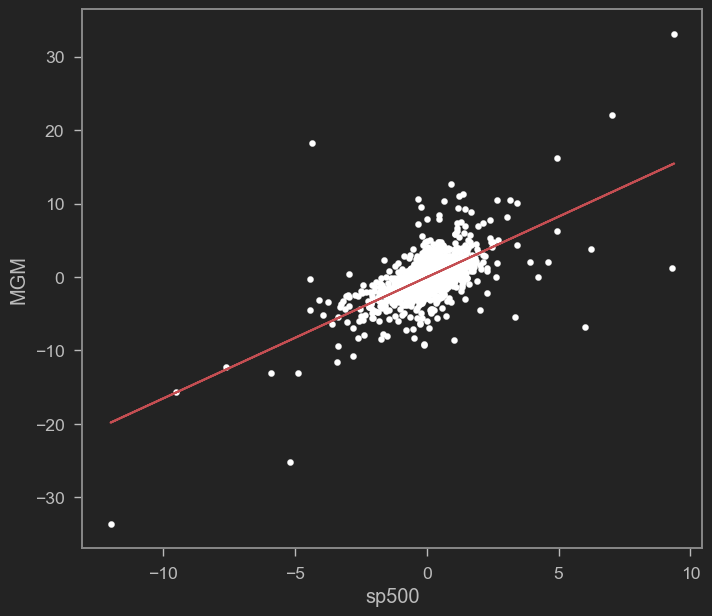

In [57]:
beta_MGM, alpha = np.polyfit(stock_daily_return['sp500'], stock_daily_return['MGM'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('MGM', beta_MGM, alpha))  

# Now let's plot the scatter plot and the straight line on one plot
stock_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'MGM', color = 'w')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stock_daily_return['sp500'], beta_MGM * stock_daily_return['sp500'] + alpha, '-', color = 'r');


## LET'S APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [58]:
beta_TSLA

np.float64(1.2359723602006574)

In [59]:
# Let's calculate the average daily rate of return for S&P500
stock_daily_return['sp500'].mean()

np.float64(0.04457361768265508)

In [60]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
mr = (stock_daily_return['sp500'].mean()) * 252
mr

np.float64(11.23255165602908)

In [61]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
fr = 0
# Calculate return for any security (TSLA) using CAPM  
ER_TSLA = fr + (beta_TSLA * (mr-fr))

In [62]:
ER_TSLA

np.float64(13.883123381378066)

- Let's apply CAPM formula to calculate the return for Boeing 

In [63]:
# Let's find beta for boeing
beta_BA, alpha = np.polyfit(stock_daily_return['sp500'], stock_daily_return['BA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('BA', beta_BA, alpha))

# Calculate return for any security (BA) using CAPM  
ER_BA = fr + (beta_BA * (mr-fr))
ER_BA

Beta for BA stock is = 1.4304608163084231 and alpha is = -0.0183753070692419


np.float64(16.06772501110989)

## LET'S CALCULATE BETA FOR ALL STOCKS

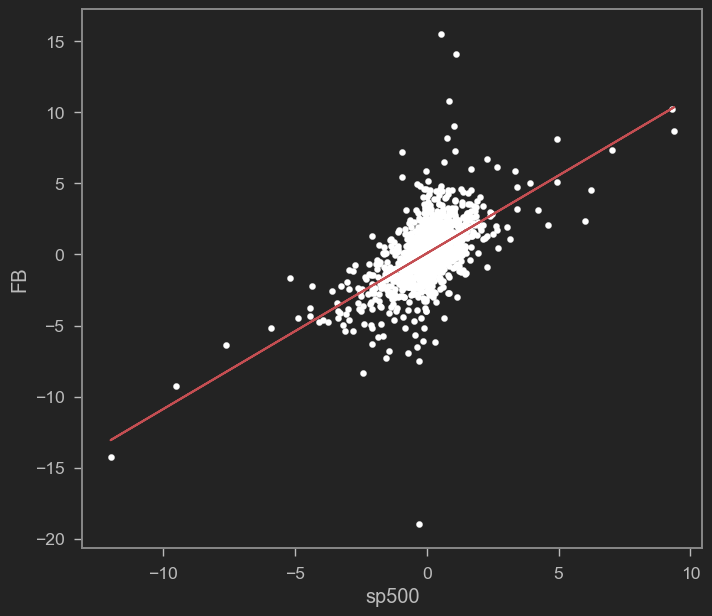

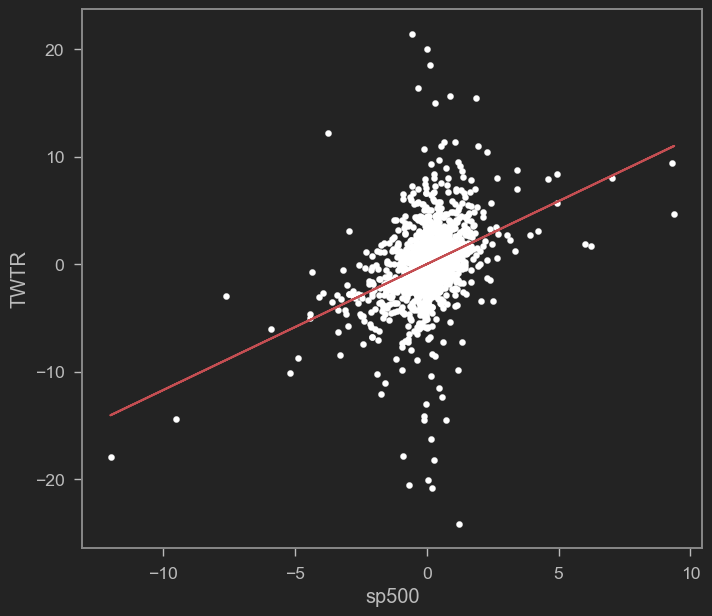

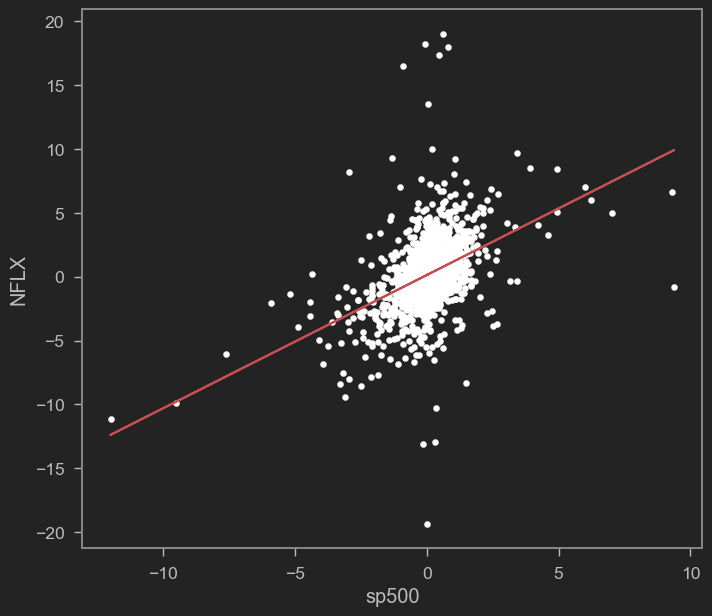

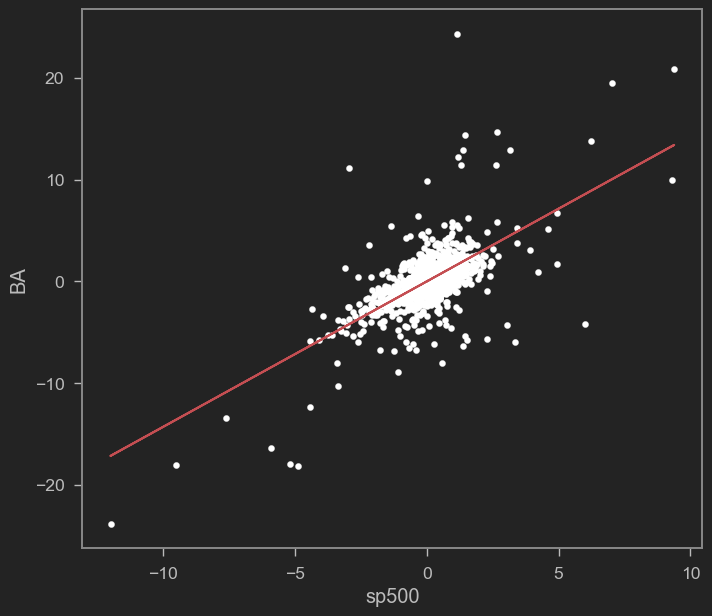

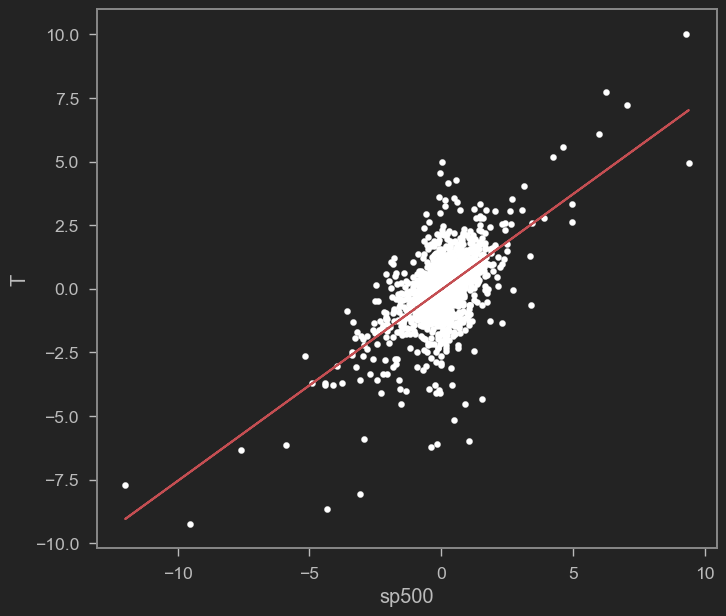

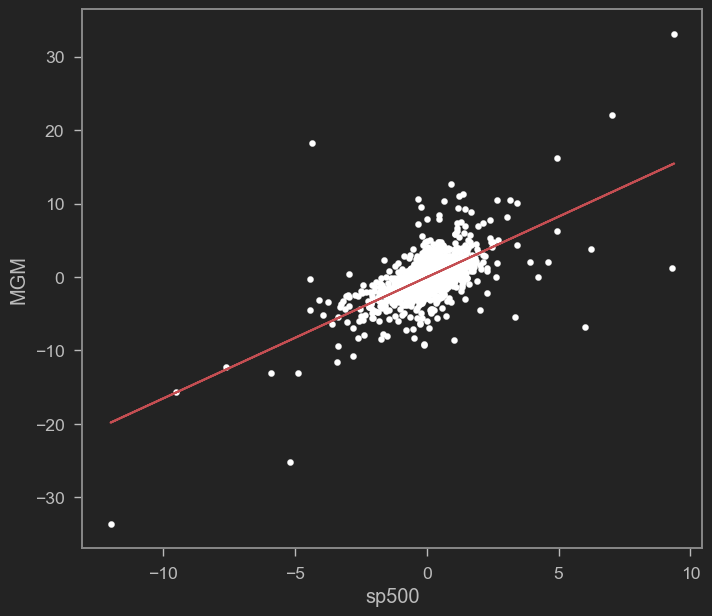

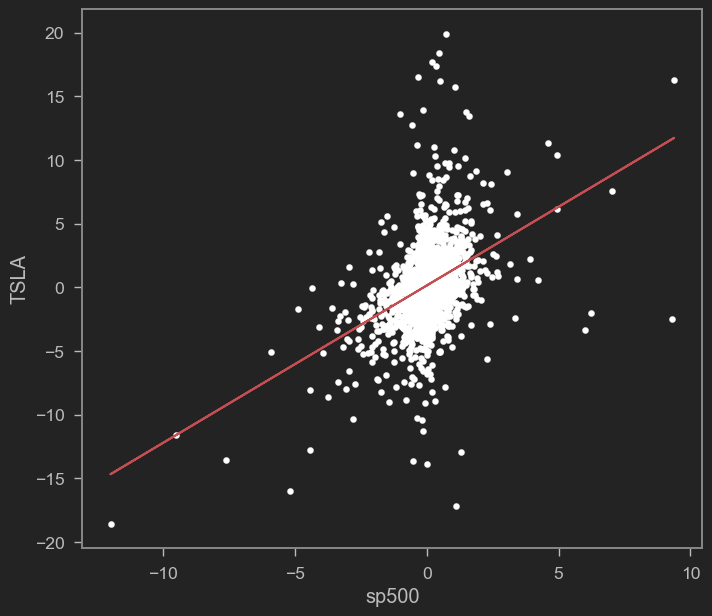

In [64]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stock_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stock_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'w')
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stock_daily_return['sp500'], stock_daily_return[i], 1)
    
    plt.plot(stock_daily_return['sp500'], b * stock_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [65]:
# Let's view Beta for every stock 
beta

{'FB': np.float64(1.096849088020326),
 'TWTR': np.float64(1.172359618315995),
 'NFLX': np.float64(1.0445724485449472),
 'BA': np.float64(1.4304608163084231),
 'T': np.float64(0.7523861924715606),
 'MGM': np.float64(1.6517124147928917),
 'TSLA': np.float64(1.2359723602006574)}

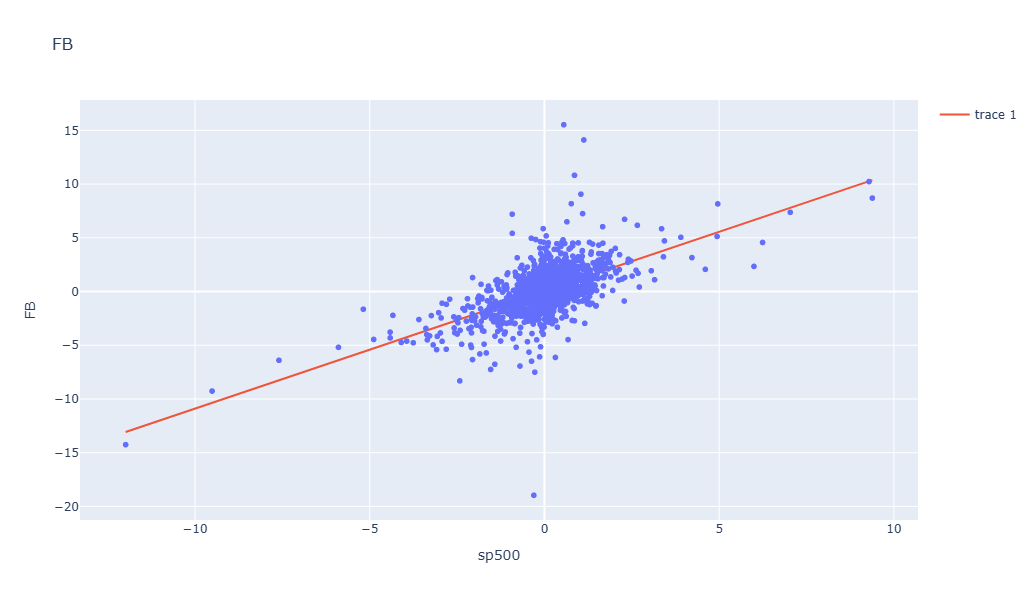

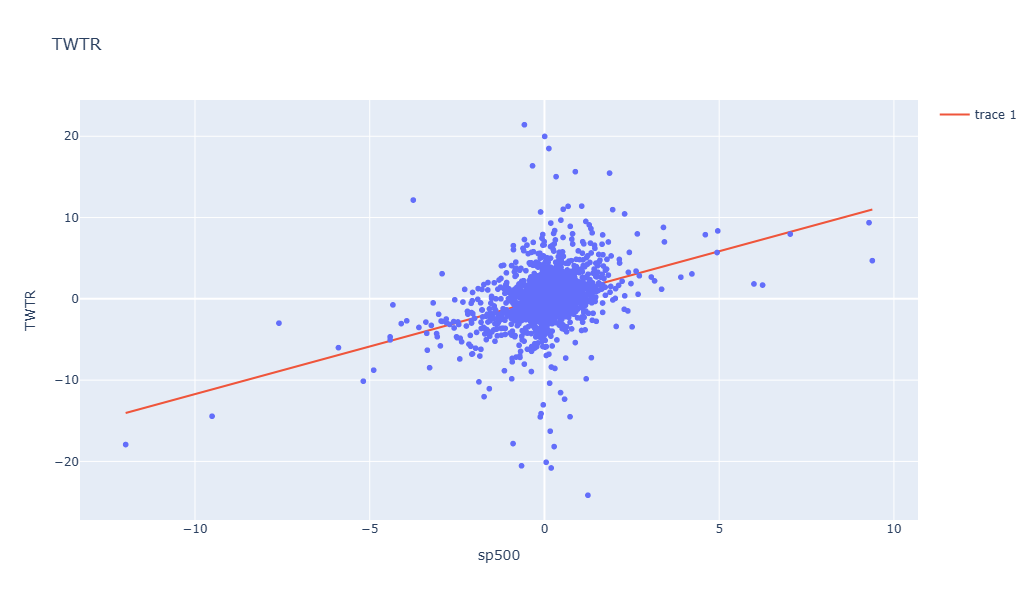

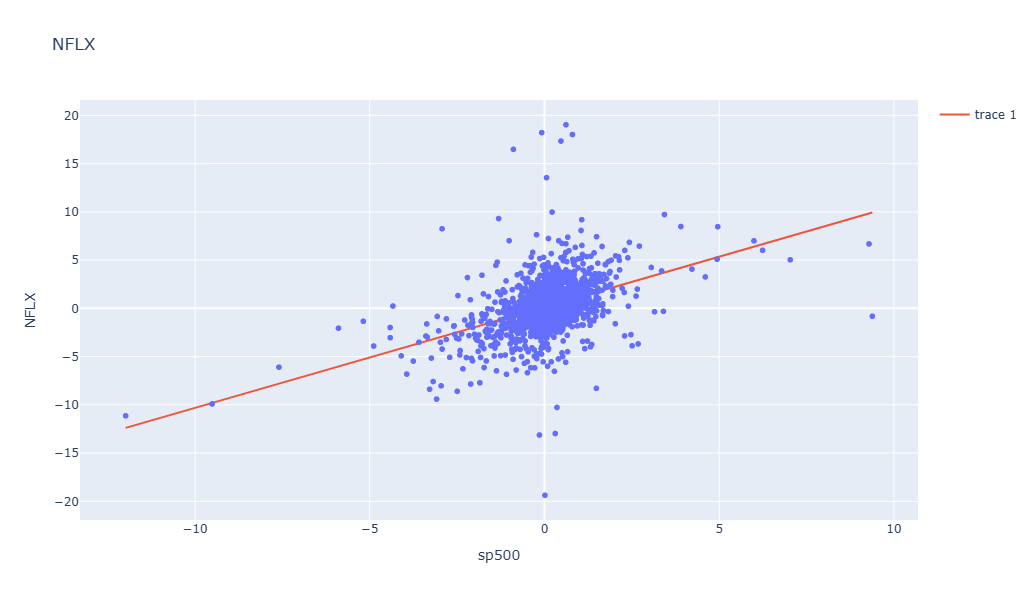

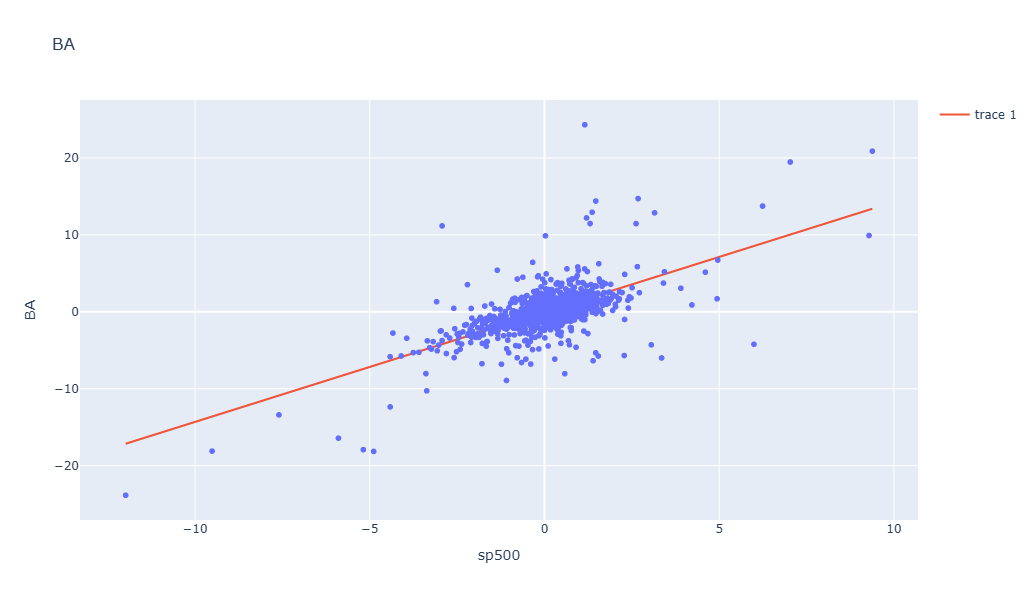

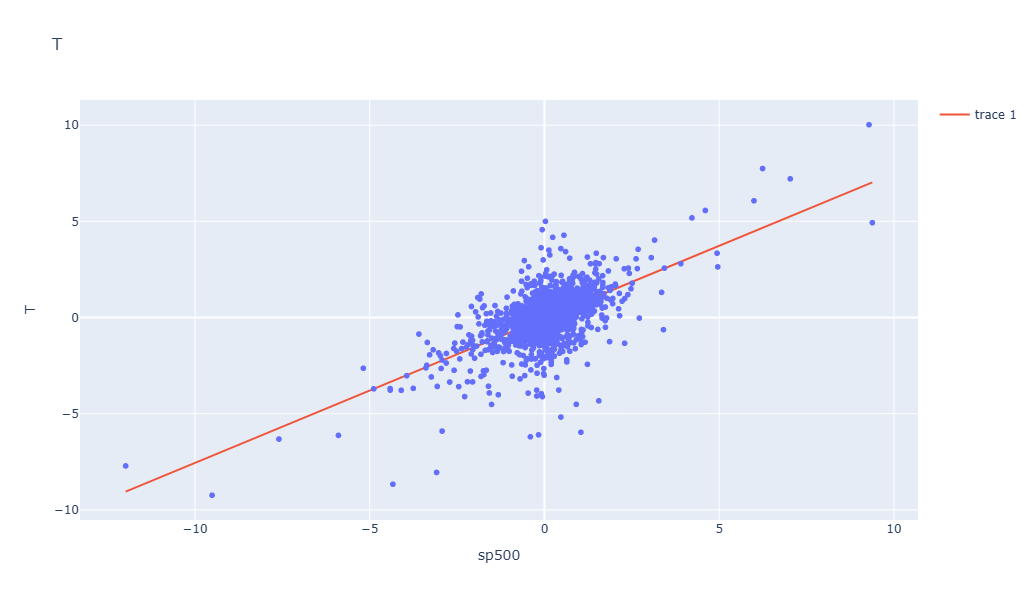

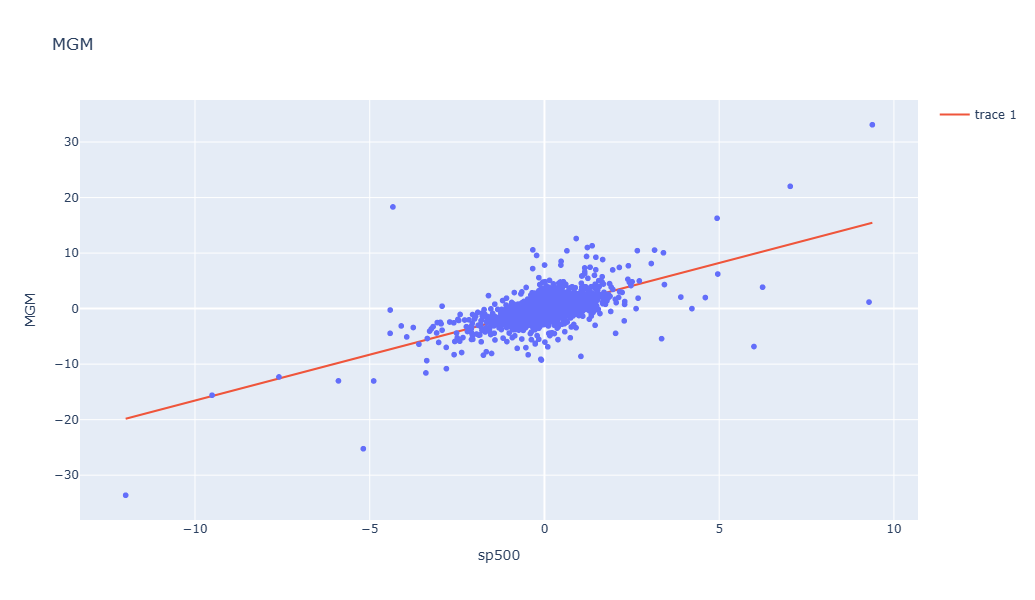

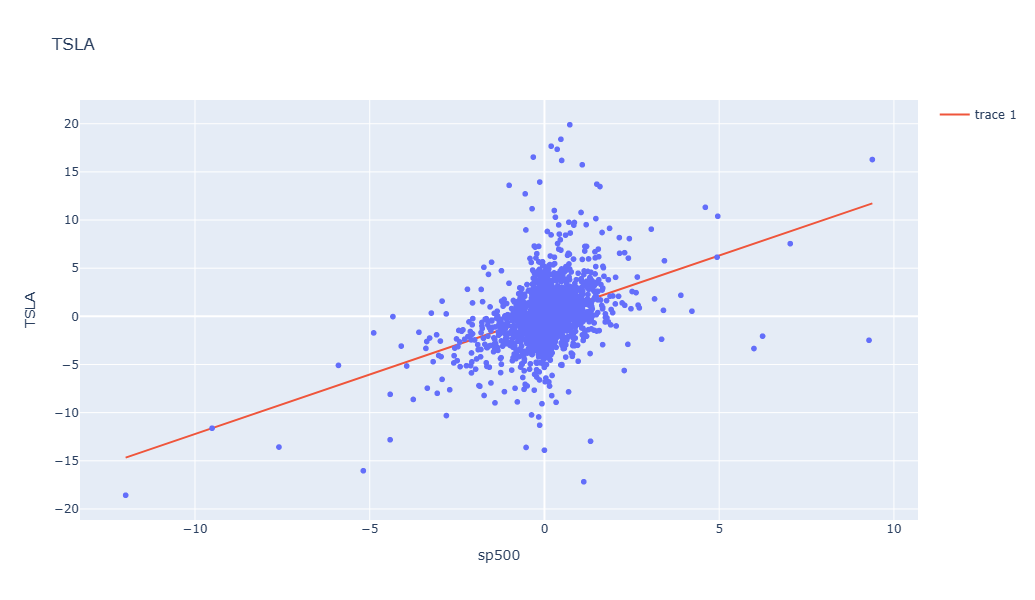

In [67]:
# Let's do the same plots but in an interactive way

for i in stock_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stock_daily_return, x = 'sp500', y = i, title = i, width=1000, height=600)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stock_daily_return['sp500'], stock_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stock_daily_return['sp500'], y = b*stock_daily_return['sp500'] + a)
    fig.show()